<a href="https://colab.research.google.com/github/profliuhao/CSIT359/blob/main/CSIT359_class5_matplotlib_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSIT 359 Class 5: Intro to Matplotlib

## History
* Plotting package started by John Hunter in 2002 to enable a MATLAB-like plotting interface in Python
* Support on all operating systems and can export to multiple graphic formats (PDF, JPG, PNG, GIF, etc.)
* Has spawned a number of add-on toolkits like seaborn

## Architecture
* Backend Layer (FigureCanvas, Renderer, Event)
    * communicate to the drawing toolkits
* Artist Layer (Artist)
    * control and fine-tune of matplotlib, just like an artist paints on the canvas
* Scripting Layer (pyplot)
    * Lightest scripting interface to easy generation of graphics and plots


## Backend Layer (matplotlib.backend_bases)
Has three built-in abstract interface classes:
1. FigureCanvas: encompasses the area onto which the figure is drawn
2. Renderer: knows how to draw on FigureCanvas
3. Event: handles user inputs such as keyboard strokes and mouse clicks

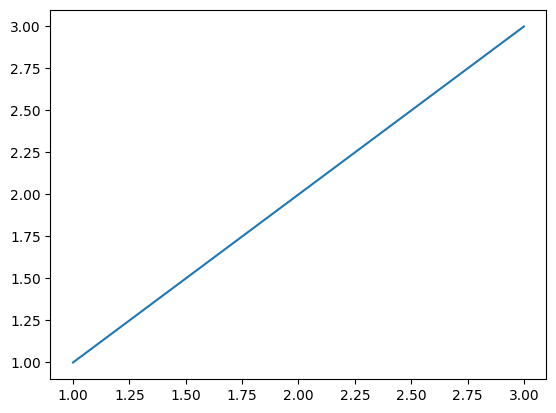

In [1]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg

# Create a figure with the specific canvas
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3], [1, 2, 3])

# Use a specific canvas to render
canvas = FigureCanvasAgg(fig)
canvas.draw()

# Save the result
canvas.print_png('my_plot.png')

## Artist Layer
* Comprised of one main object - Artist:
    * Knows how to use the Renderer to draw on the canvas.
* Title, lines, tick labels, and images are all correspond to indivudial **Artist** instance
* Two types of **Artist** objects:
    * **Primitive**: Line2D, Rectangle, Circle, and Text
    * **Composite**: Axis, Tick, Axes, and Figure
        * Most the Matplotlib API plotting methods are defined in Axes.

In [2]:
# only run once
!git clone https://github.com/profliuhao/CSIT359.git

Cloning into 'CSIT359'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 99 (delta 40), reused 48 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (99/99), 6.52 MiB | 14.12 MiB/s, done.
Resolving deltas: 100% (40/40), done.


### Example: generate a histogram using the Artist layer:

In [3]:
# create 10000 random numbers using numpy
import numpy as np
x = np.random.randn(10000)

In [4]:
x


array([ 1.21753859,  1.79997936,  0.25238709, ..., -1.93153716,
        0.86436037,  0.17923676])

In [5]:
# import FigureCanvas
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

# import Figure artist
from matplotlib.figure import Figure
fig = Figure()
canvas = FigureCanvas(fig)

# create an axes artist. Axes artist is added to the figure axes container (figure.axes)
ax = fig.add_subplot(111)
# 111: create a grid with 1 row, 1 column, and uses the frist cell in that grid for the figure axes

In [6]:
# create a histogram of the 10000 numbers
ax.hist(x,100) # 100: create 100 bins

# add a title to the figure and save it
ax.set_title ('Normal distribution')

fig.savefig('Figure_hist.png')


## Scripting Layer
* Comprised mainly of **pyplot**, a scripting interface that is lighter than the **Artist** layer

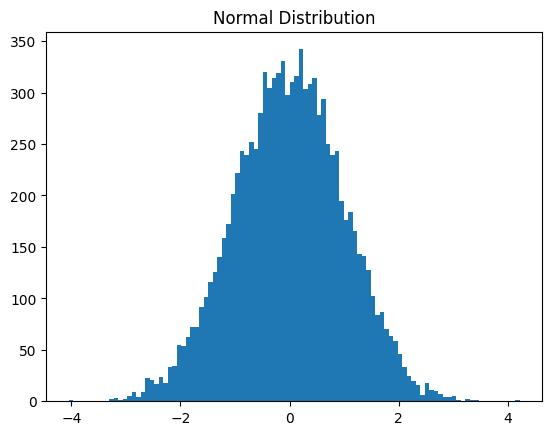

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.randn(10000)
plt.hist(x,100)
plt.title ('Normal Distribution')
plt.savefig('pyplot_hist.png')
plt.show()

## Further Reading
You can find more information about Matplotlib: its history and architecture, by the following link:

http://www.aosabook.org/en/matplotlib.html

## Basic Plotting with Matplotlib

### Plot Function
Almost all of the conventional visualization tools can be created by plot function.

In [8]:
# import pyplot
import matplotlib.pyplot as plt

# and
import numpy as np
import pandas as pd

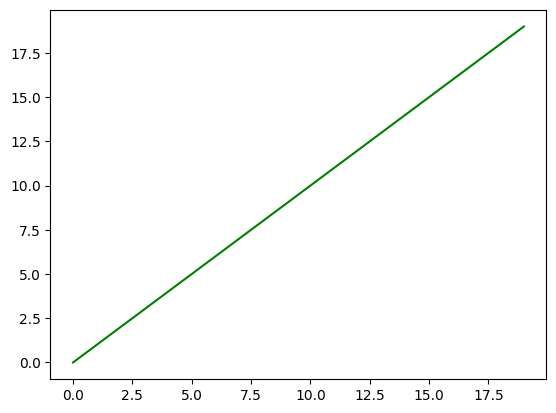

In [9]:
data = np.arange(20)
plt.plot(data,'g')
plt.show()

### Matplotlib Backends - inline
* Enforce plots to be rendered within the browser but not a separate window
* Limitation: cannot modify a figure once it's rendered

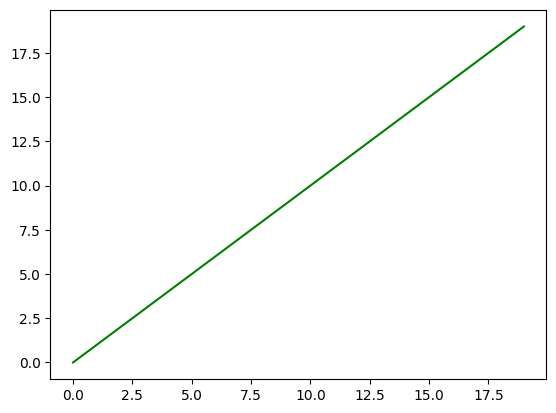

In [10]:
# %matplotlib inline

# import pyplot
import matplotlib.pyplot as plt

data = np.arange(20)
plt.plot(data,'g')
plt.show()

### Matplotlib Backends - notebook
* Any functions called will be applied to the active figure.
* Create a new figure if there is no active one.


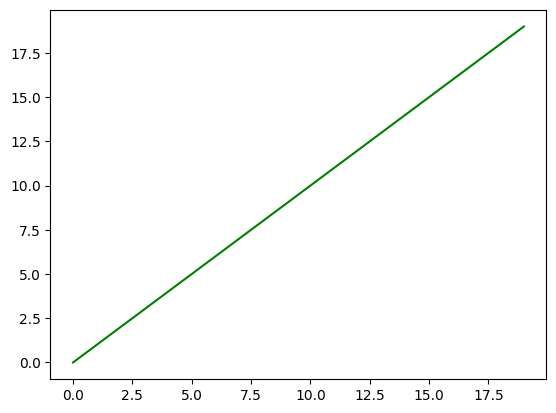

In [11]:
# %matplotlib notebook

# import pyplot
import matplotlib.pyplot as plt

data = np.arange(20)
plt.plot(data,'g')
plt.show()

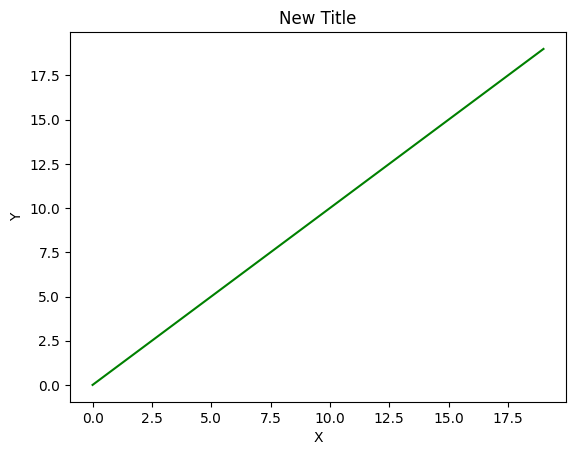

In [12]:
data = np.arange(20)
plt.plot(data,'g')
plt.xlabel("X")
plt.ylabel('Y')
plt.title("New Title")
plt.show()

In [13]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg

# Data preparation
x = np.linspace(0, 10, 100)
y = np.sin(x)


# Artist layer: Create Figure and Axes artists
fig = Figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# Artist layer: Create and customize visual elements
line = ax.plot(x, y, 'b-', linewidth=2)[0]
ax.set_xlim(0, 10)
ax.set_ylim(-1.2, 1.2)
ax.set_title('Sine Wave', fontsize=16)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.grid(True, linestyle='--', alpha=0.7)

# Backend layer: Create canvas and render
canvas = FigureCanvasAgg(fig)
canvas.draw()

# Save output
canvas.print_png('sine_wave.png')

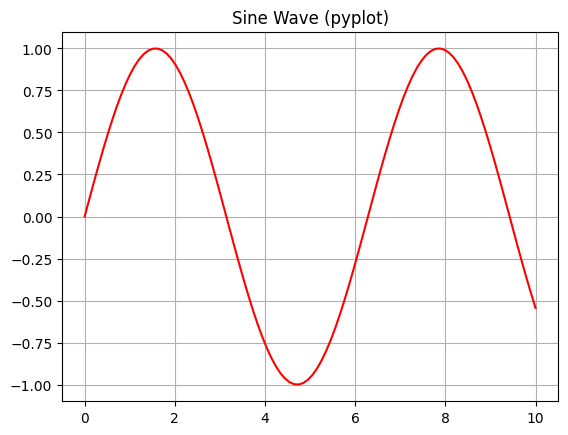

In [14]:
# Alternative: Using pyplot (scripting layer) for display
plt.figure()
plt.plot(x, y, 'r-')
plt.title('Sine Wave (pyplot)')
plt.grid(True)
plt.show()

## Figures and Subplots

To create a new figure: plt.figure()

In [15]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

* To create one or more subplots in one figure: **fig.add_subplot(a,b,N)**

* **a,b,N**: Nth subfigure of total **a** * **b** subfigures

In [16]:
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

In [17]:
# close all the figures
plt.close('all')

### More Options for Subplots

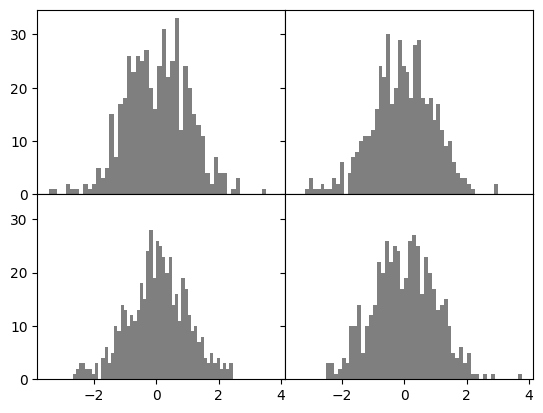

In [18]:
fig,axes = plt.subplots(2,2,sharex=True,sharey=True) # whether to share axis-x/axis-y

for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0) # adjust the spacing around subplots

In [19]:
plt.close('all')

Subplots allow you to create multiple plots within a single figure. There are several ways to create them:


Text(0.5, 1.0, 'Wider subplot')

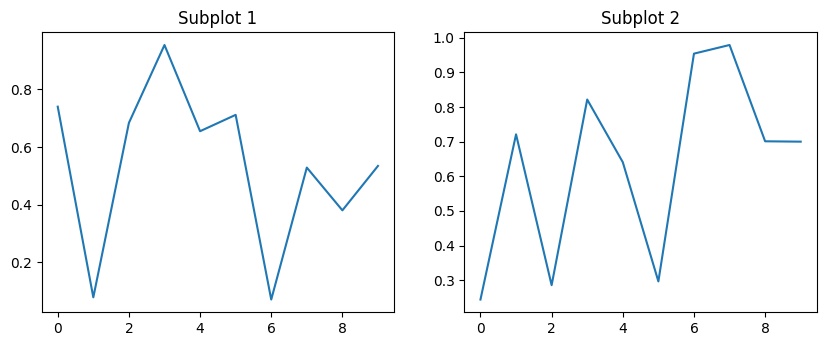

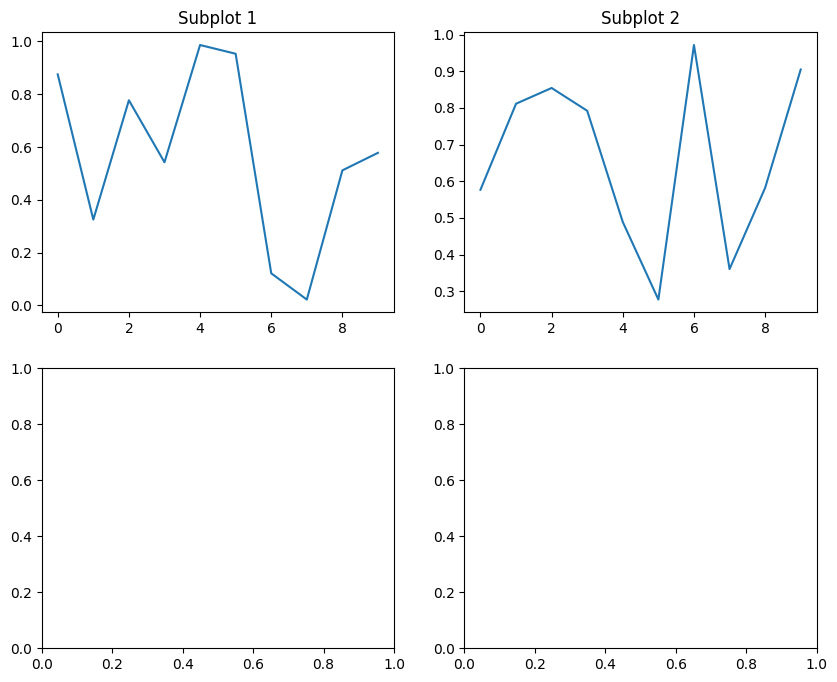

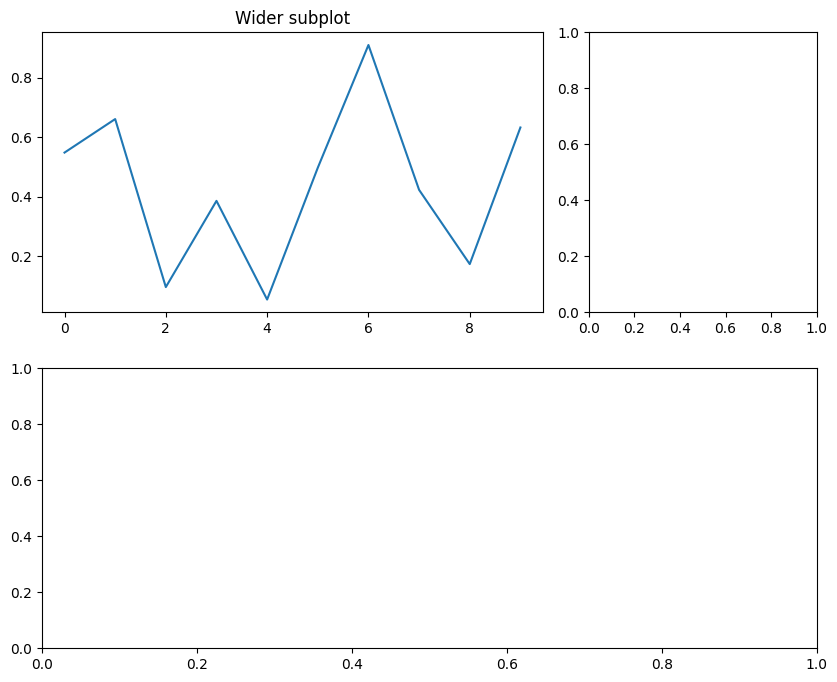

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Method 1: Using plt.subplot()
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)  # (rows, columns, index)
plt.plot(np.random.rand(10))
plt.title('Subplot 1')

plt.subplot(2, 2, 2)
plt.plot(np.random.rand(10))
plt.title('Subplot 2')

# Method 2: Using plt.subplots() - more modern approach
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].plot(np.random.rand(10))
axs[0, 0].set_title('Subplot 1')
axs[0, 1].plot(np.random.rand(10))
axs[0, 1].set_title('Subplot 2')

# Method 3: GridSpec for complex layouts
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(10, 8))
gs = GridSpec(2, 3)  # 2 rows, 3 columns

ax1 = fig.add_subplot(gs[0, :2])  # Span first row, first two columns
ax2 = fig.add_subplot(gs[0, 2])   # First row, third column
ax3 = fig.add_subplot(gs[1, :])   # Span second row, all columns

ax1.plot(np.random.rand(10))
ax1.set_title('Wider subplot')

### Colors, Markers, and Line Styles
Here are some examples to set colors, makers, and line styles in plot function
* **plot(x,y)**: plot x and y using default line style and color
* **plot(y)**:    plot y using x as index array 0 - N-1
* **plot(x,y,linestyle = ‘--’, color = ‘g’, marker = ‘o’)**: plot x and y using dotted line in green and circle marker
* **plot(x,y,’go--’)**: plot x and y using dotted line in green and circle marker



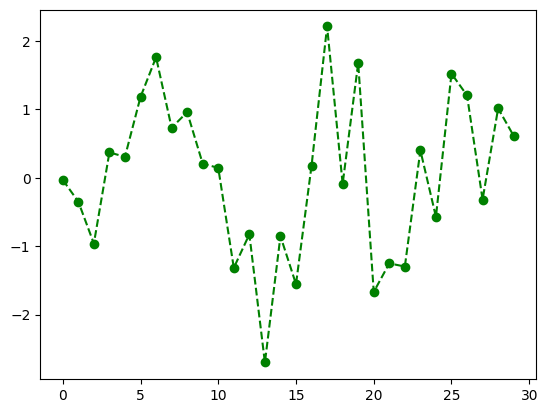

In [20]:
fig = plt.figure()

from numpy.random import randn

plt.plot(randn(30), 'go--')

Matplotlib offers multiple ways to specify colors:

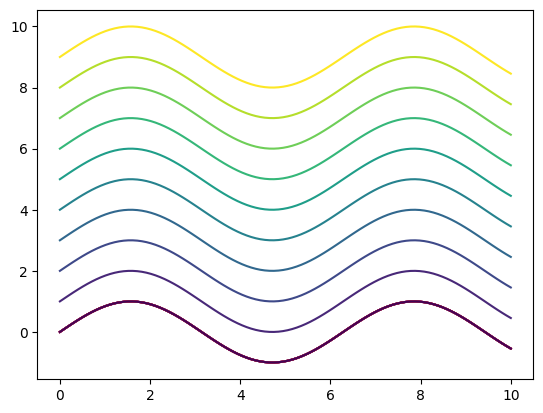

In [30]:
# 1. Named colors
plt.plot(x, y, color='red')
plt.plot(x, y, color='navy')  # There are ~150 named colors

# 2. Hex codes
plt.plot(x, y, color='#FF0000')  # Red
plt.plot(x, y, color='#0000FF')  # Blue

# 3. RGB tuples (values from 0 to 1)
plt.plot(x, y, color=(1.0, 0.0, 0.0))  # Red
plt.plot(x, y, color=(0.5, 0.5, 0.5))  # Gray

# 4. RGBA (with alpha/transparency)
plt.plot(x, y, color=(1.0, 0.0, 0.0, 0.5))  # Semi-transparent red

# 5. Colormaps for sequential data
import matplotlib.cm as cm
colors = cm.viridis(np.linspace(0, 1, 10))  # Get 10 colors from viridis
for i in range(10):
    plt.plot(x, y + i, color=colors[i])

For all the settings of colors, markers, and line styles, please refer to this link:

https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html

Markers are used to highlight individual data points:


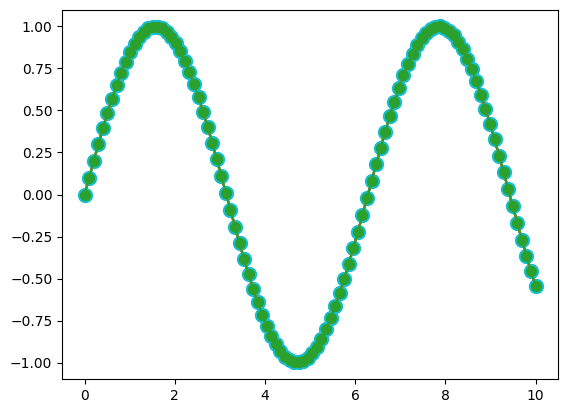

In [31]:
# Common markers
plt.plot(x, y, marker='o')  # Circle
plt.plot(x, y, marker='s')  # Square
plt.plot(x, y, marker='^')  # Triangle up
plt.plot(x, y, marker='v')  # Triangle down
plt.plot(x, y, marker='*')  # Star
plt.plot(x, y, marker='+')  # Plus
plt.plot(x, y, marker='x')  # X
plt.plot(x, y, marker='.')  # Point
plt.plot(x, y, marker='D')  # Diamond

# Customizing markers
plt.plot(x, y, marker='o', markersize=10)  # Size
plt.plot(x, y, marker='o', markerfacecolor='red')  # Fill color
plt.plot(x, y, marker='o', markeredgecolor='black')  # Edge color
plt.plot(x, y, marker='o', markeredgewidth=2)  # Edge width

Line styles control the appearance of lines connecting data points:


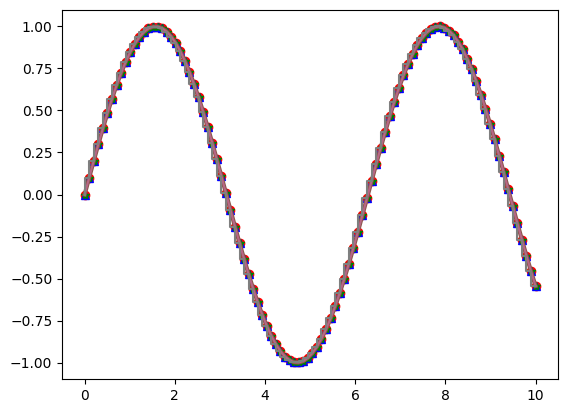

In [32]:
# Basic line styles
plt.plot(x, y, linestyle='-')    # Solid line (default)
plt.plot(x, y, linestyle='--')   # Dashed line
plt.plot(x, y, linestyle='-.')   # Dash-dot line
plt.plot(x, y, linestyle=':')    # Dotted line
plt.plot(x, y, linestyle='None') # No line (markers only)

# Shorthand notation (color + marker + line style)
plt.plot(x, y, 'ro-')  # Red line with circle markers
plt.plot(x, y, 'b^--') # Blue dashed line with triangle markers
plt.plot(x, y, 'g*:')  # Green dotted line with star markers

# Line properties
plt.plot(x, y, linewidth=3)  # Line thickness
plt.plot(x, y, alpha=0.5)    # Transparency
plt.plot(x, y, drawstyle='steps')  # Step-like line

### Ticks, Labels, and Legends

#### Setting the title, axis labels, ticks, and ticklabels

Text(0.5, 0, 'Stages')

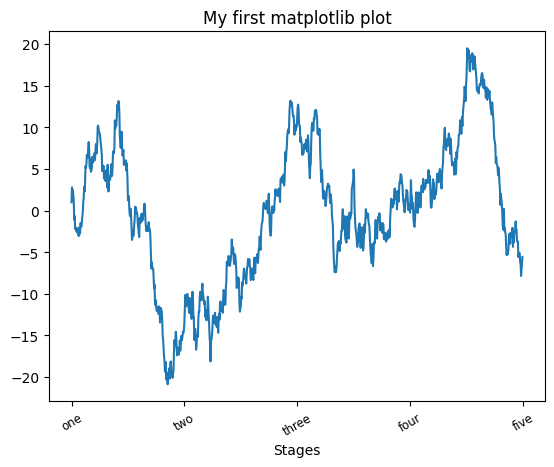

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

In [23]:
fig.savefig('first_plot.png')
plt.close('all')

#### Adding legends

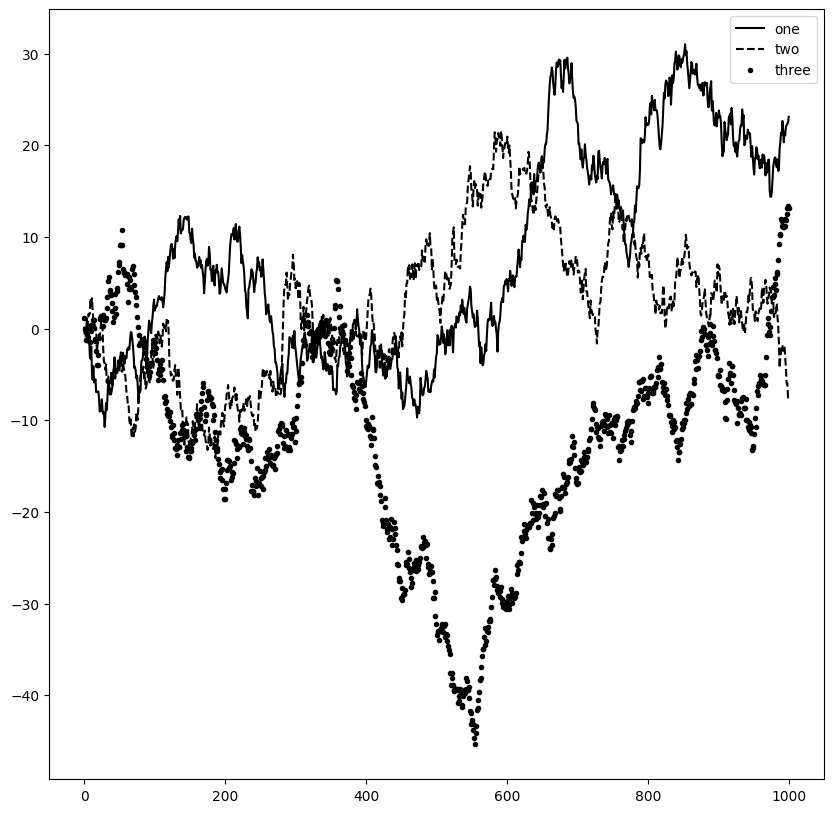

In [24]:
from numpy.random import randn
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

In [25]:
ax.legend(loc='best')

### Annotations and Drawing on a Subplot

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

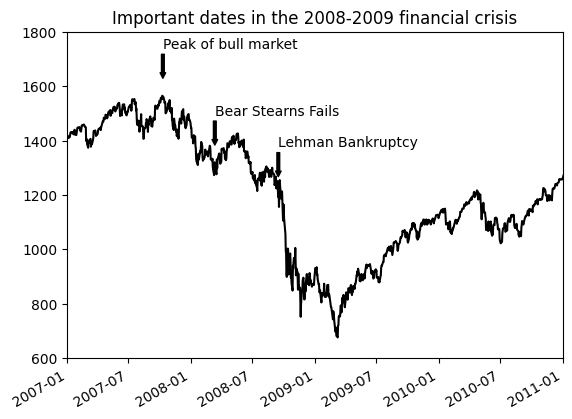

In [26]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

filename = '/content/CSIT359/Module_5/spx.csv'

data = pd.read_csv(filename, index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),   # position of the data point
                xytext=(date, spx.asof(date) + 225),     # position of the annotation
                arrowprops=dict(facecolor='black', headwidth=4, width=2,  # info of the arrow
                                headlength=4),
                horizontalalignment='left', verticalalignment='top') # position of the arrow to the annotation

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

In [27]:
data

,SPX
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75
...,...
2011-10-10,1194.89
2011-10-11,1195.54
2011-10-12,1207.25
2011-10-13,1203.66


# Class Exercise: Visualizing S&P 500 Index Data with Matplotlib

## Objective

Create a visualization of the S&P 500 Index data from 1990 to 2011 using Matplotlib. You'll practice working with financial time series data, creating subplots, and customizing plot appearances.

## Dataset

You will be working with the S&P 500 Index data stored in a CSV file named 'spx.csv'. The file contains daily closing values of the S&P 500 Index.

## Tasks

1. **Data Loading and Preparation**
   - Load the S&P 500 Index data from 'spx.csv' using pandas.
   - Ensure the date column is set as the index and parsed as datetime.

2. **Creating the Visualization**
   - Create a figure with four subplots arranged in a 2x2 grid.
   - Each subplot should represent a different time period:
     a. 1990 to 1995
     b. 1996 to 2000
     c. 2001 to 2005
     d. 2006 to 2011

3. **Subplot Customization**
   - For each subplot:
     - Plot the S&P 500 Index values for the respective time period.
     - Set an appropriate title indicating the year range.
     - Label the x-axis as "Year" and the y-axis as "Index Value".
     - Use a black line to represent the data.

4. **Figure Aesthetics**
   - Set an appropriate figure size to ensure all subplots are clearly visible.
   - Use `tight_layout()` to adjust the spacing between subplots.

5. **Code Structure and Comments**
   - Organize your code in a clear and logical manner.
   - Include comments to explain key steps in your code.



In [28]:
## your answer below